# Solutions to sheet 1

Import the necessary libraries: `numpy`, `matplotlib` and `scipy`. We can use the `as` keyword to define shortcuts to access the libraries (example: `import numpy as np` means we can access numpy functions with the `np.` syntax).

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.optimize as spo

Set some plotting options – don't worry, this is just to make the plots look prettier.

In [2]:
## - - - - - - - - - - - - - - - - - - - - - - - - - - -
##      plotting properties
## - - - - - - - - - - - - - - - - - - - - - - - - - - -

mpl.rcParams.update({
    "axes.autolimit_mode":"round_numbers",
    "axes.axisbelow":"False",
    "axes.edgecolor":"000000",
    "axes.facecolor":"FFFFFF",
    "axes.formatter.limits":"-2, 4",
    "axes.formatter.use_mathtext":"True",
    "axes.grid":"False",
    "axes.labelcolor":"000000",
    "axes.labelsize":"12",
    "axes.linewidth":"1",
    "axes.titlesize":"12",
    "axes.xmargin":"0.",
    "axes.ymargin":"0.",
    "errorbar.capsize":"1",
    "figure.autolayout":"True",
    "figure.dpi":"96",
    "figure.edgecolor":"0.50",
    "figure.facecolor":"FFFFFF",
    "figure.figsize":"6, 4.5",
    "font.family":"monospace",
    "font.size":"12",
    "legend.fancybox":"True",
    "legend.framealpha":"0.25",
    "legend.frameon":"True",
    "lines.markersize":"6",
    "savefig.dpi":"150",
    "savefig.facecolor":"FFFFFF00",
    "xtick.bottom":"True",
    "xtick.color":"000000",
    "xtick.direction":"in",
    "xtick.major.size":"10",
    "xtick.minor.size":"5",
    "xtick.top":"True",
    "ytick.color":"000000",
    "ytick.direction":"in",
    "ytick.left":"True",
    "ytick.major.size":"10",
    "ytick.minor.size":"5",
    "ytick.right":"True",
})

## Drawing random numbers from a PDF

First step: Initialise a random number generator.

In [3]:
gen = np.random.default_rng()

Drawing numbers from a uniform distribution in the interval $[0, 1)$:

In [4]:
values = gen.uniform(0, 1, 100)

In [5]:
values[:10]

array([0.94532502, 0.79008841, 0.85801543, 0.01455905, 0.13550619,
       0.27834652, 0.42475311, 0.02098333, 0.08668928, 0.51427941])

Next step: plotting the drawn values.

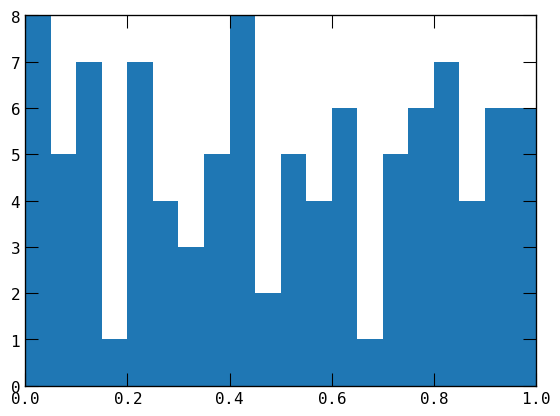

In [6]:
plt.hist(values, bins=20, range=(0, 1))

plt.show()

Let's do the same with a Gaussian distribution, centred around 15.

In [7]:
values = gen.normal(15, 1, 1000)

In [8]:
values[:10]

array([15.62287576, 14.53010327, 14.04535014, 15.97778564, 15.7209485 ,
       17.00601297, 14.81362672, 15.23966728, 17.68526263, 15.03695111])

Now let's plot them again.

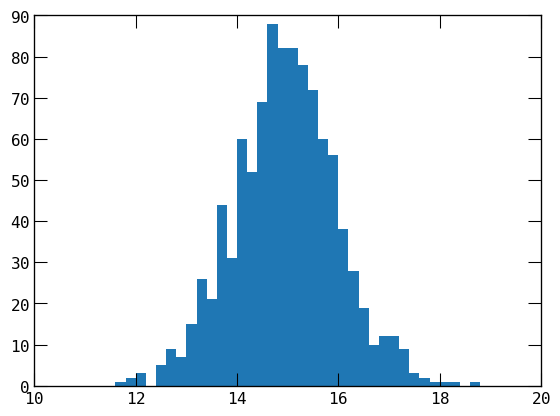

In [9]:
plt.hist(values, bins=50, range=(10, 20))

plt.show()

## Defining and plotting analytical functions

Now let's plot the analytical function as well.

In [10]:
def gauss(x, mu, sigma):
    pref = 1 / sigma / np.sqrt(2 * np.pi)
    return pref * np.exp(- pow(x - mu, 2) / 2 / sigma / sigma)

In [11]:
xfunc = np.linspace(10, 20, 101)

In [12]:
yfunc = gauss(xfunc, 15, 1)

Now let's plot the function and the drawn values into the same figure:

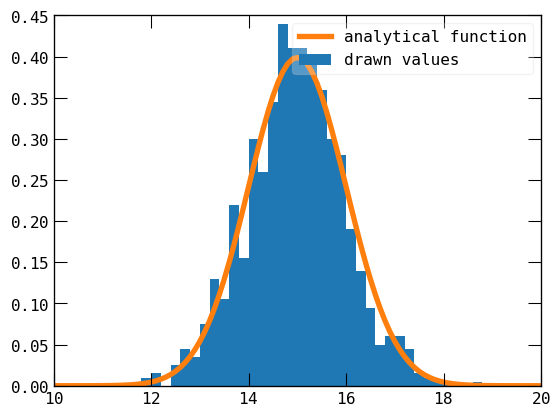

In [13]:
plt.hist(values, bins=50, range=(10, 20), density=True, label="drawn values")
plt.plot(xfunc, yfunc, label="analytical function", lw=4)
plt.legend()

plt.show()

## Fitting functions to data

Let's use the previously generated data and fit a Gaussian function to it, to get estimators for mu and sigma. First we need to get the bin edges and contents.

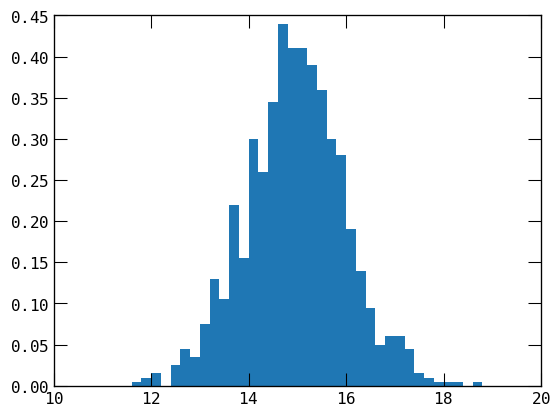

In [14]:
bin_entries, bin_edges, _ = plt.hist(values, bins=50, range=(10, 20), density=True)

plt.show()

In [15]:
bin_entries

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.005,
       0.01 , 0.015, 0.   , 0.025, 0.045, 0.035, 0.075, 0.13 , 0.105,
       0.22 , 0.155, 0.3  , 0.26 , 0.345, 0.44 , 0.41 , 0.41 , 0.39 ,
       0.36 , 0.3  , 0.28 , 0.19 , 0.14 , 0.095, 0.05 , 0.06 , 0.06 ,
       0.045, 0.015, 0.01 , 0.005, 0.005, 0.005, 0.   , 0.005, 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   ])

In [16]:
bin_edges

array([10. , 10.2, 10.4, 10.6, 10.8, 11. , 11.2, 11.4, 11.6, 11.8, 12. ,
       12.2, 12.4, 12.6, 12.8, 13. , 13.2, 13.4, 13.6, 13.8, 14. , 14.2,
       14.4, 14.6, 14.8, 15. , 15.2, 15.4, 15.6, 15.8, 16. , 16.2, 16.4,
       16.6, 16.8, 17. , 17.2, 17.4, 17.6, 17.8, 18. , 18.2, 18.4, 18.6,
       18.8, 19. , 19.2, 19.4, 19.6, 19.8, 20. ])

Calculate the bin centres.

In [17]:
bin_centres = np.array([0.5 * (bin_edges[i] + bin_edges[i+1]) for i in range(len(bin_edges)-1)])

In [18]:
bin_centres

array([10.1, 10.3, 10.5, 10.7, 10.9, 11.1, 11.3, 11.5, 11.7, 11.9, 12.1,
       12.3, 12.5, 12.7, 12.9, 13.1, 13.3, 13.5, 13.7, 13.9, 14.1, 14.3,
       14.5, 14.7, 14.9, 15.1, 15.3, 15.5, 15.7, 15.9, 16.1, 16.3, 16.5,
       16.7, 16.9, 17.1, 17.3, 17.5, 17.7, 17.9, 18.1, 18.3, 18.5, 18.7,
       18.9, 19.1, 19.3, 19.5, 19.7, 19.9])

Now perform the actual fit. Save the optimized parameter values into `popt`.

In [19]:
popt, pcov = spo.curve_fit(gauss, bin_centres, bin_entries)

In [20]:
print(popt)

[1. 1.]


Ok, this doesn't seem to work ... Let's add some bounds to the parameters: $\mu \in [12, 17]$ and $\sigma \in [0.1, 5.0]$.

In [21]:
popt, pcov = spo.curve_fit(gauss, bin_centres, bin_entries, bounds=([12, 0.1], [17, 5]))

In [22]:
print(popt)

[14.96983394  0.9676898 ]


This worked!

For comparison, plot the histogram and the fitted curve again.

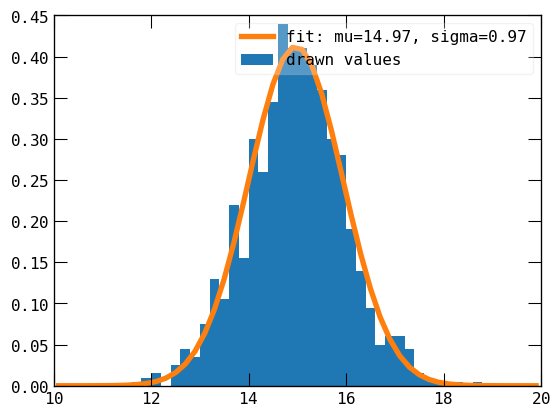

In [23]:
plt.hist(values, bins=50, range=(10, 20), density=True, label="drawn values")
plt.plot(bin_centres, gauss(bin_centres, *popt), lw=4,
         label='fit: mu=%.2f, sigma=%.2f' % tuple(popt))
plt.legend()

plt.show()

# Bonus question

In [24]:
def monty_hall(switch_door=False, print_debug=False):
    """Simulates the Monty Hall problem. Returns Win/Lose boolean.
    
    That is: choses a random door for the player, then choses another random 
    door to reveal (which is neither the winning door nor the door chosen by
    the player). Then, with the 'switch_door' switch, let's the player switch
    from the intially chosen door to the other door that is still closed.
    Returns a Win/Lose boolean.

    """
    doors = ["A", "B", "C"]
    winning_door = np.random.choice(doors)
    chosen_door = np.random.choice(doors)

    # Doors the host can choose from for the reveal.
    reveal_choices = doors.copy()
    reveal_choices.remove(winning_door)
    if chosen_door != winning_door:
        reveal_choices.remove(chosen_door)

    revealed_door = np.random.choice(reveal_choices)
    
    if print_debug:
        print(f"Chosen door:   {chosen_door}")
        print(f"Winning door:  {winning_door}")
        print(f"Revealed door: {revealed_door}")
    
    if switch_door:
        chosen_door = list(set(doors).difference(set(revealed_door)).difference(set(chosen_door)))[0]
        if print_debug:
            print(f"New choice:    {chosen_door}")

    return chosen_door == winning_door

In [25]:
monty_hall(switch_door=True, print_debug=True)

Chosen door:   B
Winning door:  C
Revealed door: A
New choice:    C


True

In [26]:
monty_hall(switch_door=False, print_debug=True)

Chosen door:   C
Winning door:  B
Revealed door: A


False

In [27]:
n_experiments = 20_000

experiments = [monty_hall(switch_door=True) for i in range(n_experiments)]
print(f"When switching doors after reveal: {experiments.count(True) / n_experiments}")

experiments = [monty_hall(switch_door=False) for i in range(n_experiments)]
print(f"When *not* switching doors:        {experiments.count(True) / n_experiments}")

When switching doors after reveal: 0.6716
When *not* switching doors:        0.33615
